In [ ]:
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 40.31 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
train_covid_dir=os.path.join(train_dir,'COVID19')
train_normal_dir=os.path.join(train_dir,'NORMAL')
test_covid_dir=os.path.join(test_dir,'COVID19')
test_normal_dir=os.path.join(test_dir,'NORMAL')


In [ ]:
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names=os.listdir(train_normal_dir)
print(train_covid_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])


test_normal_names=os.listdir(test_normal_dir)
print(test_covid_names[:10])


['COVID19(361).jpg', 'COVID-19 (186).jpg', 'COVID19(156).jpg', 'COVID19(468).jpg', 'COVID-19 (15).jpg', 'COVID-19 (5).jpeg', 'COVID19(308).jpg', 'COVID19(560).jpg', 'COVID19(204).jpg', 'COVID19(351).jpg']
['COVID19(361).jpg', 'COVID-19 (186).jpg', 'COVID19(156).jpg', 'COVID19(468).jpg', 'COVID-19 (15).jpg', 'COVID-19 (5).jpeg', 'COVID19(308).jpg', 'COVID19(560).jpg', 'COVID19(204).jpg', 'COVID19(351).jpg']
['COVID19(375).jpg', 'COVID19(106).jpg', 'COVID-19 (691).jpg', 'COVID-19 (839).jpg', 'COVID-19 (425).jpg', 'COVID19(499).jpg', 'COVID-19 (830).jpg', 'COVID-19 (864).jpg', 'COVID19(561).jpg', 'COVID19(210).jpg']
['COVID19(375).jpg', 'COVID19(106).jpg', 'COVID-19 (691).jpg', 'COVID-19 (839).jpg', 'COVID-19 (425).jpg', 'COVID19(499).jpg', 'COVID-19 (830).jpg', 'COVID-19 (864).jpg', 'COVID19(561).jpg', 'COVID19(210).jpg']


In [ ]:
print("train dataset covid images: ",len(train_covid_names))
print("train dataset normal images: ",len(train_normal_names))
print("test dataset covid images: ",len(test_covid_names))
print("test dataset normal images: ",len(test_normal_names))
print("total train images: ",len(train_covid_names+train_normal_names))
print("total test covid images: ",len(test_covid_names+test_normal_names))

train dataset covid images:  545
train dataset normal images:  1266
test dataset covid images:  167
test dataset normal images:  317
total train images:  1811
total test covid images:  484


In [ ]:
#DATA VISVUALIZATION

['/content/datasets/Data/train/COVID19/COVID19(361).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (186).jpg', '/content/datasets/Data/train/COVID19/COVID19(156).jpg', '/content/datasets/Data/train/COVID19/COVID19(468).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (15).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (5).jpeg', '/content/datasets/Data/train/COVID19/COVID19(308).jpg', '/content/datasets/Data/train/COVID19/COVID19(560).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1149).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1258).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(668).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1211).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(530).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(612).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1081).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1542).jpg']


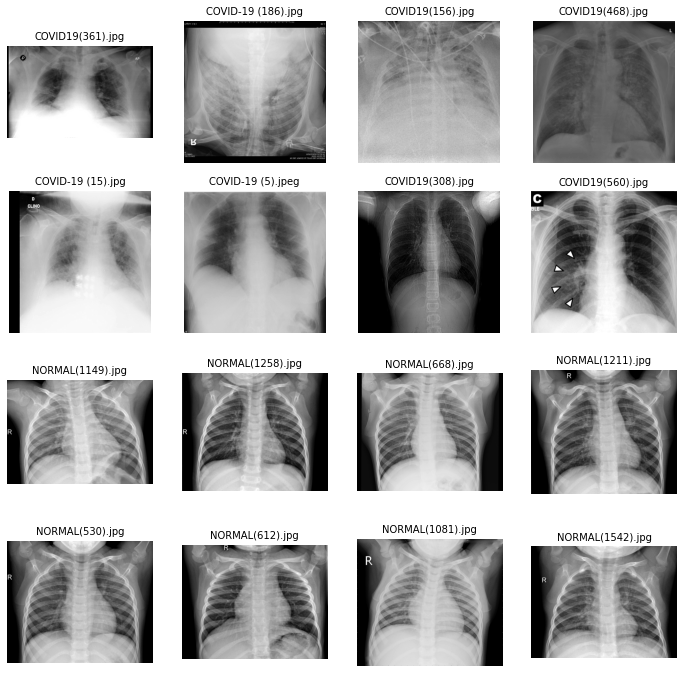

In [ ]:

import matplotlib.image as mpimg
nrows=4
ncols=4
fig=plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic=[os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic=[os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]


print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
plt.show()  

In [ ]:
#DATA AUGUMENTATION

In [ ]:


train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2,zoom_range=0.2,horizontal_flip=True)


validation_datagen=ImageDataGenerator(rescale=1./255)



test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),subset='training',batch_size=32,class_mode='binary')

validation_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),subset='validation',batch_size=32,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')



Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
#CONVOLUTIONAL MODEL

In [ ]:
model=Sequential()

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))



model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
#compile and training


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator,validation_steps=10)


Epoch 1/10
46/46 [==============================] - 80s 1s/step - loss: 0.8528 - accuracy: 0.7937 - val_loss: 0.3873 - val_accuracy: 0.9281
Epoch 2/10
46/46 [==============================] - 48s 1s/step - loss: 0.1897 - accuracy: 0.9351 - val_loss: 0.2013 - val_accuracy: 0.9563
Epoch 3/10
46/46 [==============================] - 48s 1s/step - loss: 0.1738 - accuracy: 0.9393 - val_loss: 0.2843 - val_accuracy: 0.9469
Epoch 4/10
46/46 [==============================] - 48s 1s/step - loss: 0.1541 - accuracy: 0.9406 - val_loss: 0.1414 - val_accuracy: 0.9656
Epoch 5/10
46/46 [==============================] - 48s 1s/step - loss: 0.1550 - accuracy: 0.9469 - val_loss: 0.1012 - val_accuracy: 0.9594
Epoch 6/10
46/46 [==============================] - 48s 1s/step - loss: 0.1726 - accuracy: 0.9476 - val_loss: 0.1431 - val_accuracy: 0.9406
Epoch 7/10
46/46 [==============================] - 49s 1s/step - loss: 0.1313 - accuracy: 0.9586 - val_loss: 0.1149 - val_accuracy: 0.9594
Epoch 8/10
46/46 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

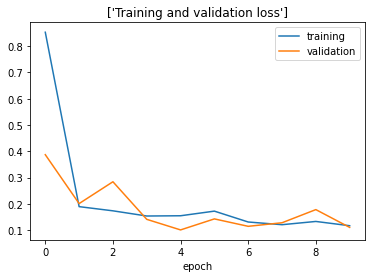

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title(['Training and validation loss'])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

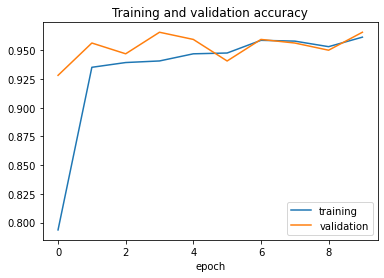

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss,test_acc=model.evaluate(test_generator)
print('test acc:{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 11s 666ms/step - loss: 0.1299 - accuracy: 0.9607
test acc:0.96074378490448 test loss:0.12993218004703522


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn 
  print(path)
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19 Xray Image')
  else:
    print('Normal Xray Image')



Saving covidtesting image 2.jfif to covidtesting image 2.jfif
/content/covidtesting image 2.jfif
covidtesting image 2.jfif
Covid19 Xray Image


In [ ]:
model.save('model.covidpredict')

INFO:tensorflow:Assets written to: model.covidpredict/assets


In [ ]:
from google.colab import files
files.download('model.covidpredict')